In [3]:
from IPython.display import Image
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
from helper import *

import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)}) 

In [5]:
course_df = feature_engineer("CS-4820")
course_df['dropped'].value_counts()


776 students pre-enrolled in CS-4820
3 data point is nan during processing
Sanity check passed
30 students dropped


0    743
1     30
Name: dropped, dtype: int64

## Use SP22 and FA22 as train, and SP23 as test

In [7]:
x_train, y_train, x_test, y_test = make_semester_specific_train_test(course_df, target_sem = "sp23",
                                                                     past_sems = ["fa22", "sp22"])

17 students dropped in the train data


In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

tree = DecisionTreeClassifier() #default: Gini impurity
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [17]:
np.sum(tree.predict(x_test))

10

In [18]:
np.sum(y_test)

13

## Perform prediction on all useful courses

In [21]:
import pickle
from sklearn.model_selection import train_test_split
with open('useful_courses.pkl', 'rb') as f:
    eng_filtered_exams = pickle.load(f)

In [30]:
# score = []
in_sample_diff = []
out_sample_diff = []
relative_out_sample_diff = [] # difference divided by test size
rnd_in_sample_diff = []
rnd_out_sample_diff = []
for course in eng_filtered_exams:
    course_df = feature_engineer(course)
    # Semester specific, predict SP23
    x_train, y_train, x_test, y_test = make_semester_specific_train_test(course_df, target_sem = "sp23",
                                                                         past_sems = ["fa22", "sp22"])
    tree = DecisionTreeClassifier() #default: Gini impurity
    tree.fit(x_train, y_train)
    in_sample_diff.append(np.sum(tree.predict(x_train)) - np.sum(y_train))
    out_sample_diff.append(np.sum(tree.predict(x_test)) - np.sum(y_test))

    # Randomly split
    X = np.concatenate((x_train, x_test))
    y = np.concatenate((y_train, y_test))
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)
    tree = DecisionTreeClassifier() #default: Gini impurity
    tree.fit(x_train, y_train)
    rnd_in_sample_diff.append(np.sum(tree.predict(x_train)) - np.sum(y_train))
    rnd_out_sample_diff.append(np.sum(tree.predict(x_test)) - np.sum(y_test))

11 students pre-enrolled in AEP-4400
0 data point is nan during processing
Sanity check passed
2 students dropped
1 students dropped in the train data
20 students pre-enrolled in AEP-5400
1 data point is nan during processing
Sanity check passed
2 students dropped
1 students dropped in the train data
71 students pre-enrolled in BEE-5330
1 data point is nan during processing
Sanity check passed
8 students dropped
1 students dropped in the train data
139 students pre-enrolled in BME-2110
0 data point is nan during processing
Sanity check passed
4 students dropped
1 students dropped in the train data
104 students pre-enrolled in BME-3020
0 data point is nan during processing
Sanity check passed
3 students dropped
2 students dropped in the train data
13 students pre-enrolled in BME-3410
0 data point is nan during processing
Sanity check passed
2 students dropped
1 students dropped in the train data
112 students pre-enrolled in CEE-3610
0 data point is nan during processing
Sanity check pas

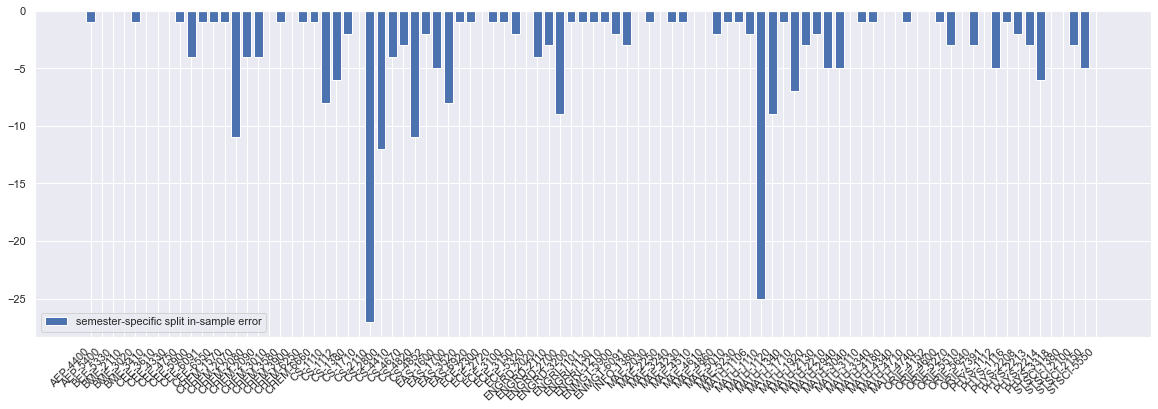

In [31]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(20, 6))

plt.axhline(y=0, color='black', linestyle='--')

plt.bar(eng_filtered_exams, np.array(in_sample_diff),
        align = 'center', label = 'semester-specific split in-sample error')

plt.xticks(range(len(eng_filtered_exams)), eng_filtered_exams, rotation=45, ha='right');
plt.legend();

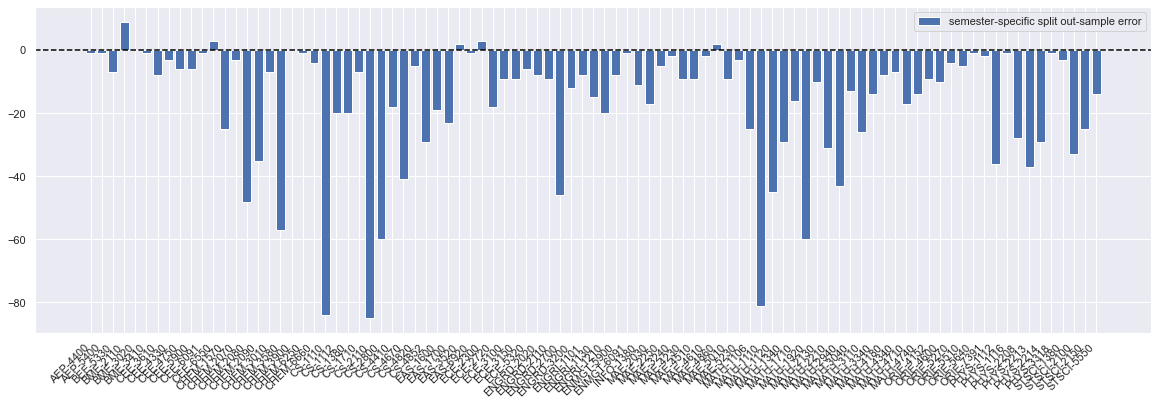

In [32]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(20, 6))

plt.axhline(y=0, color='black', linestyle='--')

plt.bar(eng_filtered_exams, np.array(out_sample_diff),
        align = 'center', label = 'semester-specific split out-sample error')

plt.xticks(range(len(eng_filtered_exams)), eng_filtered_exams, rotation=45, ha='right');
plt.legend();

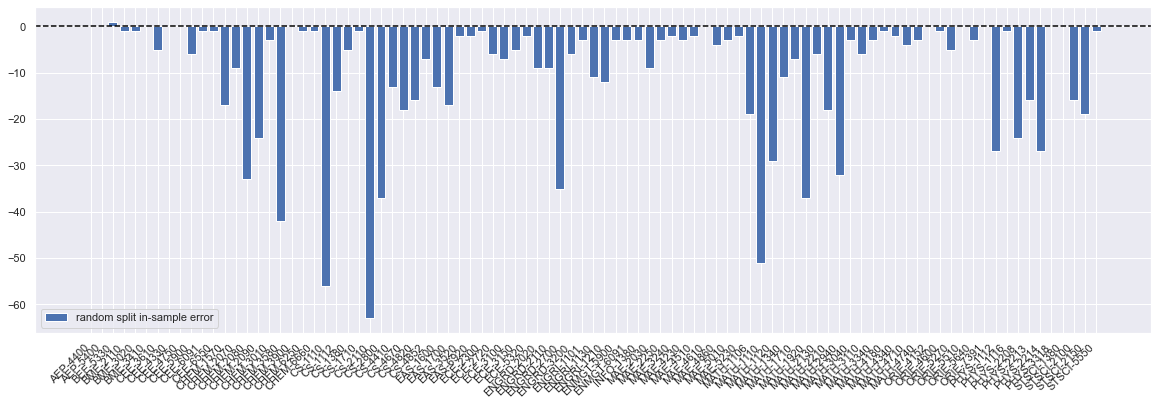

In [50]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(20, 6))

plt.axhline(y=0, color='black', linestyle='--')

plt.bar(eng_filtered_exams, np.array(rnd_in_sample_diff),
        align = 'center', label = 'random split in-sample error')

plt.xticks(range(len(eng_filtered_exams)), eng_filtered_exams, rotation=45, ha='right');
plt.legend();

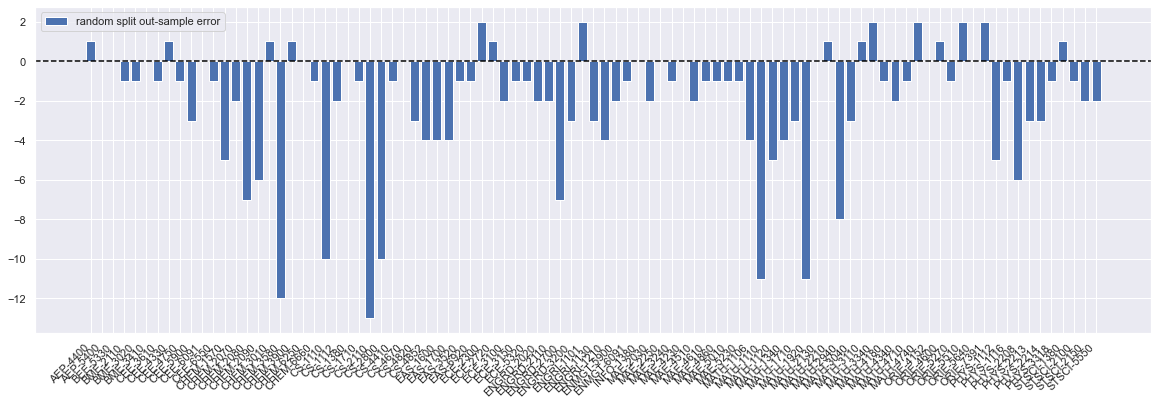

In [51]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(20, 6))

plt.axhline(y=0, color='black', linestyle='--')

plt.bar(eng_filtered_exams, np.array(rnd_out_sample_diff),
        align = 'center', label = 'random split out-sample error')

plt.xticks(range(len(eng_filtered_exams)), eng_filtered_exams, rotation=45, ha='right');
plt.legend();

In [46]:
course_df = feature_engineer("CS-2800")

1369 students pre-enrolled in CS-2800
9 data point is nan during processing
Sanity check passed
73 students dropped


In [47]:
x_train, y_train, x_test, y_test = make_semester_specific_train_test(course_df, target_sem = "sp23",
                                                                        past_sems = ["fa22", "sp22"])
tree = DecisionTreeClassifier() #default: Gini impurity
tree.fit(x_train, y_train)
# print(np.sum(tree.predict(x_train)) - np.sum(y_train))
# print(np.sum(tree.predict(x_test)) - np.sum(y_test))

13 students dropped in the train data


DecisionTreeClassifier()

In [42]:
np.sum(y_test)

60